### 第一部分模拟
### 一、温度变化动态模拟
### 公式：

生成的年度温度变化图使用了余弦波函数：

$$\[ T(t) = -A \cdot \cos\left(\frac{2\pi t}{\text{days}}\right) + B \]$$

### 原理：

- 温度变化是周期性的，遵循余弦波的形式。余弦波是一种周期性变化，具有振幅和频率。
- 在这里，\( A \) 是温度的振幅，决定了温度变化的幅度；\( B \) 是平均温度，决定了余弦波的中心线。

### 说明：

1. 函数 `generate_annual_temperatures` 接受三个参数：\( A \)，\( B \) 和 `days`，返回一年中每一天的温度数据。
2. \( A \) 表示温度的振幅，它决定了温度变化的幅度，即最高温度和最低温度之间的差异。
3. \( B \) 表示平均温度，它是余弦波的中心线，决定了整个温度曲线的位置。
4. 使用余弦函数来模拟温度变化的原因是余弦函数具有周期性和光滑性，以便识别季节性温度变化。
5. 图中标注了最高温度和最低温度，并用箭头指示了它们在图中的位置。


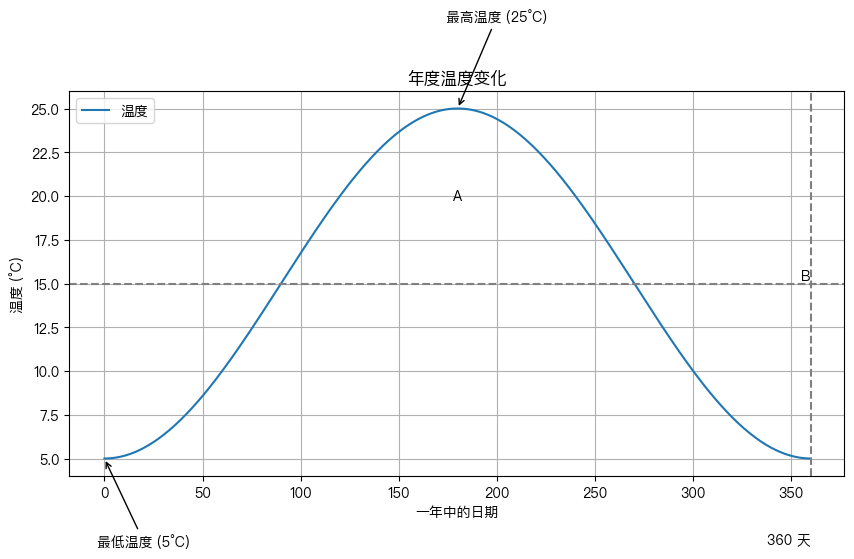

In [1]:
import numpy as np
import matplotlib.pyplot as plt
font_path = '/System/Library/Fonts/PingFang.ttc'
plt.rcParams['font.sans-serif'] = ['PingFang HK'] 
plt.rcParams['axes.unicode_minus'] = False  

def generate_annual_temperatures(A, B, days):
    """生成基于余弦波的年度温度变化"""
    t = np.arange(days)
    return -A * np.cos(2 * np.pi * t / days) + B

# 温度振幅和平均温度
A = 10  # 温度振幅
B = 15  # 平均温度

# 生成一年的温度数据
T = generate_annual_temperatures(A, B, 360)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.arange(360), T, label='温度')
ax.annotate(f'最高温度 ({B+A}°C)', xy=(180, B + A), xytext=(200, B + A + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
ax.annotate(f'最低温度 ({B-A}°C)', xy=(0, B - A), xytext=(20, B - A - 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
ax.axhline(y=B, color='gray', linestyle='--')
ax.text(360, B, 'B', verticalalignment='bottom', horizontalalignment='right')
ax.text(180, B + A/2, 'A', verticalalignment='center', horizontalalignment='center')

ax.axvline(x=360, color='gray', linestyle='--')
ax.text(360, B - 15, '360 天', verticalalignment='bottom', horizontalalignment='right')

ax.set_title('年度温度变化')
ax.set_xlabel('一年中的日期')
ax.set_ylabel('温度 (°C)')

ax.grid(True)

ax.legend()
plt.show()


### 二、种子扩散模拟
### 公式：

种子通过风力散播的模型结合了正态分布和指数分布来模拟种子的移动过程：

1. 正常距离 \( s_N \)：基于风速的恒定散布距离，其计算公式为：

$$\[ s_N = \text{wind_speed} \times \mathcal{N}(1, 0.1) \]$$

其中，$$\( \mathcal{N}(1, 0.1) \)$$ 表示均值为 1，标准差为 0.1 的正态分布。

2. 长距离 \( s_L \)：遵循指数分布，其计算公式为：

$$\[ s_L = \text{exp}(-\lambda_L t) \]$$

其中，\( \lambda_L \) 是指数分布的参数，设定长距离平均散布为 100 单位。

3. 实际散布距离取 \( s_N \) 和 \( s_L \) 中的较大者。

### 原理：

- 种子的移动过程是随机的，受到风力的影响，同时也存在长距离的随机扩散。
- 正态分布用来模拟风速对种子的影响，较大的风速会使种子更远地散布。
- 指数分布用来模拟种子的长距离扩散，其中 \( \lambda_L \) 是指数分布的参数，控制着种子的扩散速率。

### 说明：

1. 函数 `seed_spread_simulation_modified` 模拟了种子通过风力散播的过程，接受三个参数：`num_seeds`（种子数）、`wind_speed`（风速）和 `num_steps`（模拟步数）。
2. 种子的初始位置为 (0, 0)，随着模拟的进行，种子会根据风力和随机扩散逐步散布到不同的位置。
3. 图中展示了种子散布的最终结果，用散点图表示，其中透明度为 0.5，使得重叠部分更加明显。
4. 图中的 x 轴和 y 轴表示空间坐标。


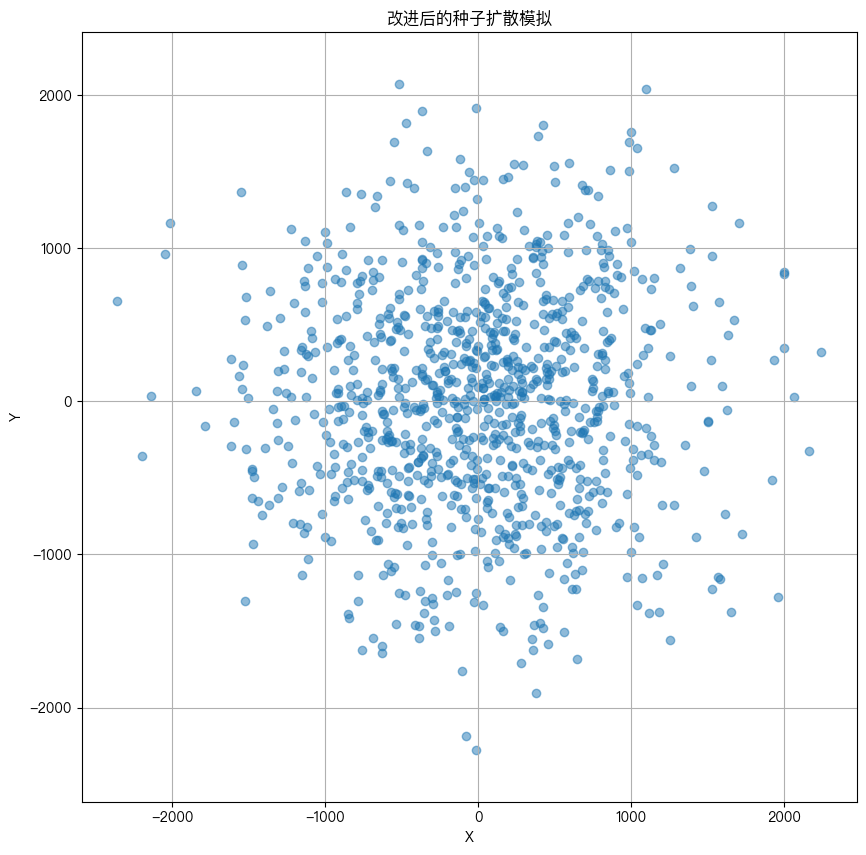

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def seed_spread_simulation_modified(num_seeds, wind_speed, num_steps):
    """
    模拟种子通过风力散播的二维随机散步模型，结合正常距离sN和长距离sL。
    num_seeds: 散布的种子数
    wind_speed: 风速（影响散布的距离）
    num_steps: 模拟的时间步数
    """
    # 初始化种子的位置
    positions = np.zeros((num_seeds, 2))

    # 指数分布参数，设定长距离平均散布为100单位
    lambda_L = 1/100

    # 每一步模拟种子的移动
    for _ in range(num_steps):
        # 随机生成风向，使用[0, 2π]范围的均匀分布
        wind_direction = np.random.uniform(0, 2 * np.pi, num_seeds)

        # 正常距离sN：基于风速的恒定散布距离
        sN = wind_speed * np.random.normal(1, 0.1, num_seeds)

        # 长距离sL：遵循指数分布
        sL = np.random.exponential(scale=1/lambda_L, size=num_seeds)

        # 实际散布距离取sN和sL中的较大者
        actual_distance = np.maximum(sN, sL)

        steps = actual_distance[:, None] * np.array([np.cos(wind_direction), np.sin(wind_direction)]).T

        positions += steps
    
    return positions

num_seeds = 1000  # 模拟1000个种子
wind_speed = 0.5  # 风速，假设0.5/步
num_steps = 50    # 模拟步数

positions = seed_spread_simulation_modified(num_seeds, wind_speed, num_steps)

plt.figure(figsize=(10, 10))
plt.scatter(positions[:, 0], positions[:, 1], alpha=0.5)
plt.title("改进后的种子扩散模拟")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()


### 三、种子扩散模拟
### 公式：

1. **Logistic 生长函数**：

$$\[ P(t) = \frac{K \cdot P_0 \cdot \text{exp}(r_{\text{eff}} \cdot t)}{K + P_0 \cdot (\text{exp}(r_{\text{eff}} \cdot t) - 1)} \]$$

其中：
   - \( P(t) \) 是时间 \( t \) 时的种群大小。
   - \( K \) 是环境容量，表示环境可以容纳的最大种群数量。
   - \( P_0 \) 是初始种群大小。
   - \( r_{\text{eff}} = r - d \) 是有效增长率，考虑到了死亡率 \( d \) 的影响。
   - \( r \) 是内禀增长率，表示种群在没有外界影响下的增长率。
   - \( t \) 是时间，通常以月为单位。

2. **生长率调整器**：
$$\[ \text{temp\_modifier} =
\begin{cases} 
1 & \text{,if} \ optimal\_temp - temp\_range \leq \text{temperature} \leq optimal\_temp + temp\_range \\
\text{exp}\left(-\frac{(\text{temperature} - optimal\_temp)^2}{2 \cdot (\text{temp\_range} / 2)^2}\right) & \text{,else}
\end{cases}
\]$$

其中：
   - \(\text{temperature}\) 是当前温度。
   - \( \text{optimal\_temp} \) 是最适宜的温度。
   - \( \text{temp\_range} \) 是温度适宜范围，表示温度在这个范围内不受影响。

### 原理：

- Logistic 生长函数描述了种群数量随时间变化的模型，考虑了环境容量和死亡率对种群增长的影响。
- 生长率调整器根据当前温度调整种群增长率，保证种群在最适宜的温度范围内有最大的增长率。

### 说明：

1. 函数 `logistic_growth` 计算了种群的增长，接受时间 \( t \)、环境容量 \( K \)、初始种群大小 \( P_0 \)、内禀增长率 \( r \) 和死亡率 \( \text{death\_rate} \) 作为参数。
2. 函数 `growth_rate_modifier` 根据温度调整生长率，接受当前温度、最适宜温度和温度适宜范围作为参数。
3. 图中展示了一年内蒲公英种群数量随时间的变化趋势，使用折线图表示。
4. x 轴表示时间（日期），y 轴表示种群数量，单位可以是任意数量单位，根据具体情况来选择。


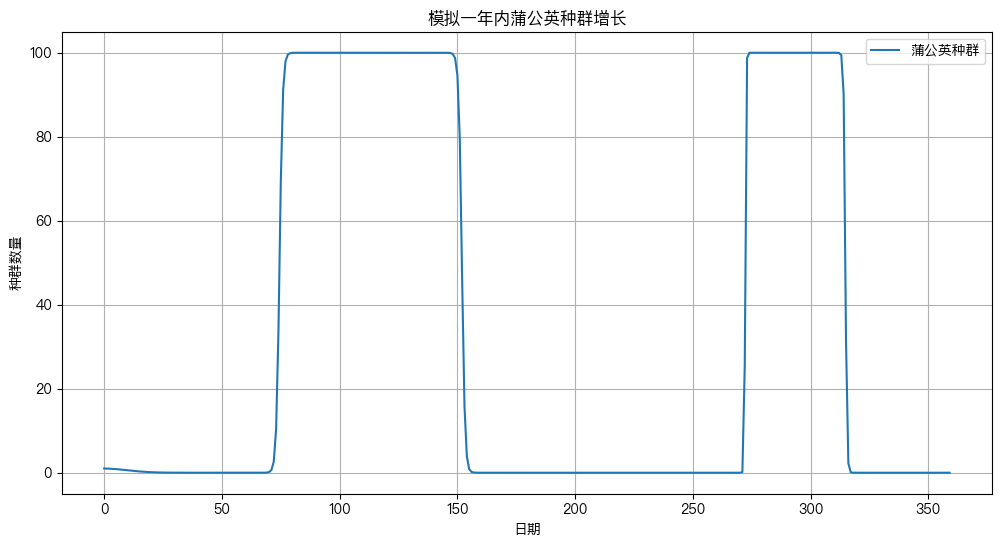

In [3]:
def logistic_growth(t, K, P0, r, death_rate):
    """
    包含死亡率的 Logistic 生长函数。
    t: 时间（例如，以月为单位）
    K: 环境容量
    P0: 初始种群大小
    r: 内禀增长率
    death_rate: 个体死亡率
    """
    effective_growth_rate = r - death_rate
    return K * P0 * np.exp(effective_growth_rate * t) / (K + P0 * (np.exp(effective_growth_rate * t) - 1))

def growth_rate_modifier(temperature, optimal_temp, temp_range):
    """
    根据温度调整生长率。
    temperature: 当前温度
    optimal_temp: 最适宜温度
    temp_range: 最适宜范围内温度不受影响的温度范围
    """
    if optimal_temp - temp_range <= temperature <= optimal_temp + temp_range:
        return 1
    else:
        return np.exp(-((temperature - optimal_temp) ** 2) / (2 * (temp_range / 2) ** 2))

# 模拟参数
days = 360  # 一年天数
K = 100     # 环境容量
P0 = 1      # 初始种群大小
r = 0.03    # 内禀增长率
death_rate = 0.01  # 死亡率
optimal_temp = 15  # 最适宜的温度（°C）
temp_range = 5     # 温度适宜范围（°C）

# 生成一年的温度数据
temperature_data = generate_annual_temperatures(10, 15, days)

# 计算每天的种群大小
population = np.zeros(days)
population[0] = P0
for day in range(1, days):
    temp_modifier = growth_rate_modifier(temperature_data[day], optimal_temp, temp_range)
    population[day] = logistic_growth(day, K, population[day-1], r * temp_modifier, death_rate)

plt.figure(figsize=(12, 6))
plt.plot(population, label='蒲公英种群')
plt.title('模拟一年内蒲公英种群增长')
plt.xlabel('日期')
plt.ylabel('种群数量')
plt.grid(True)
plt.legend()
plt.show()


### 第二部分模拟

本部分模拟了在哥伦比亚特区的蒲公英种群的增长情况，考虑了温度、风速等环境因素对种群增长的影响。主要步骤如下：

#### 模拟参数设置：
- 总月数：\(24\)个月
- 蒙特卡洛模拟次数：\(100\)次
- 每次模拟的种子数：\(1000\)个
- 环境容量：\(K = 100\)
- 初始种群大小：\(P0 = 10\)
- 内禀增长率：\(r = 0.03\)
- 死亡率：\(0.015\)
- 最适宜的温度：\(15^\circ C\)
- 温度适宜范围：\(\pm 5^\circ C\)

#### 模拟过程：
   - 对于每次模拟，首先使用前面的模拟原理生成每个月的温度和风速数据。
   - 然后，根据温度和风速计算温度修正因子，用以调整种群的增长率。
   - 每个月的种群增长模拟采用逻辑生长模型，其中考虑了温度修正因子。
   - 若为每年的第一个月，则将初始种群大小作为初始种群大小；否则，取上个月的种群大小作为初始种群大小。
   - 重复以上步骤\(100\)次，得到每个月的种群大小。
#### 蒙特卡洛模拟使用：
蒙特卡洛模拟通过随机抽样来估计结果的分布或行为。在本模拟中，蒙特卡洛模拟被用来估计种群在不同温度和风速条件下的增长情况，通过多次模拟来得到平均种群大小，并考虑了不同温度和风速条件下的变化。


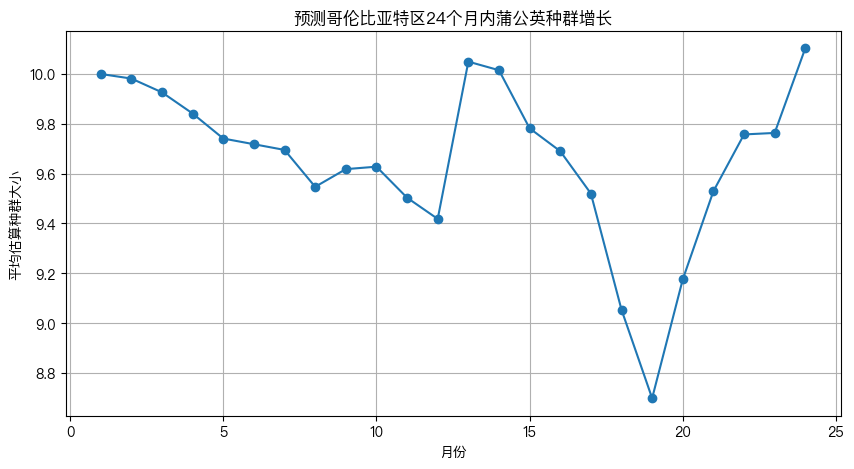

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 环境参数 - 哥伦比亚特区 (DC)
mu_T_DC = 12.64  # 平均温度
sigma_T_DC = 8.63  # 温度标准差
mu_W_DC = 13.97  # 平均风速
sigma_W_DC = 9.51  # 风速标准差

# 模拟参数
num_months = 24  # 总月数
num_simulations = 100  # 蒙特卡洛模拟次数
num_seeds = 1000  # 每次模拟的种子数
K = 100  # 环境容量
P0 = 10  # 初始种群大小
r = 0.03  # 内禀增长率
death_rate = 0.015  # 死亡率
optimal_temp = 15  # 最适宜的温度
temp_range = 5  # 温度适宜范围

def generate_monthly_temperatures(mu, sigma, num_months):
    return np.random.normal(mu, sigma, num_months)

# 进行蒙特卡洛模拟
final_populations = np.zeros((num_simulations, num_months))
for simulation in range(num_simulations):
    temperatures = generate_monthly_temperatures(mu_T_DC, sigma_T_DC, num_months)
    wind_speeds = np.random.normal(mu_W_DC, sigma_W_DC, num_months)
    for month in range(num_months):
        seed_positions = seed_spread_simulation_modified(num_seeds, wind_speeds[month], 1)
        temp_modifier = growth_rate_modifier(temperatures[month], optimal_temp, temp_range)
        if month % 12 == 0:
            final_populations[simulation, month] = logistic_growth(month, K, P0, r * temp_modifier, death_rate)
        else:
            final_populations[simulation, month] = logistic_growth(month, K, final_populations[simulation, month-1], r * temp_modifier, death_rate)

# 计算平均植株数量
average_populations = np.mean(final_populations, axis=0)

# 绘制结果
months = np.arange(1, num_months + 1)
plt.figure(figsize=(10, 5))
plt.plot(months, average_populations, marker='o')
plt.title('预测哥伦比亚特区24个月内蒲公英种群增长')
plt.xlabel('月份')
plt.ylabel('平均估算种群大小')
plt.grid(True)
plt.show()


### 与上面模拟过程相同，只不过展开每月结果，放结果就行，不用做重复说明

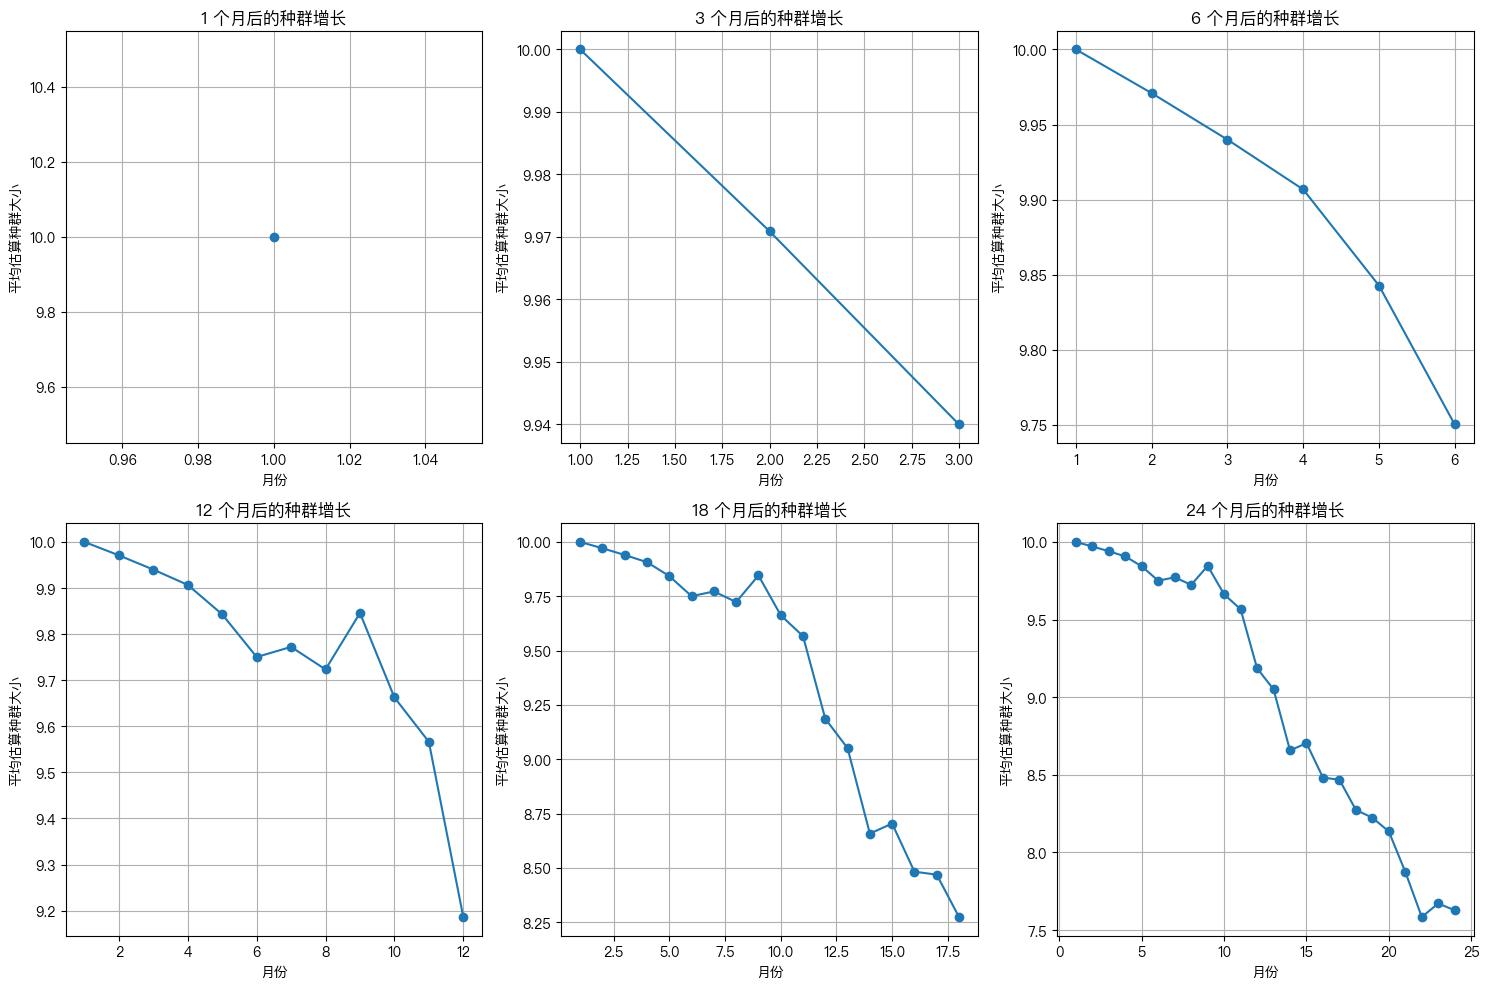

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 环境参数 - 哥伦比亚特区 (DC)
mu_T_DC = 12.64  # 平均温度
sigma_T_DC = 8.63  # 温度标准差
mu_W_DC = 13.97  # 平均风速
sigma_W_DC = 9.51  # 风速标准差

# 模拟参数
num_months = [1, 3, 6, 12, 18, 24]  # 总月数
num_simulations = 100  # 蒙特卡洛模拟次数
num_seeds = 1000  # 每次模拟的种子数
K = 100  # 环境容量
P0 = 10  # 初始种群大小
r = 0.03  # 内禀增长率
death_rate = 0.015  # 死亡率
optimal_temp = 15  # 最适宜的温度
temp_range = 5  # 温度适宜范围

def generate_monthly_temperatures(mu, sigma, num_months):
    return np.random.normal(mu, sigma, num_months)

# 进行蒙特卡洛模拟
final_populations = np.zeros((num_simulations, max(num_months)))
for simulation in range(num_simulations):
    for idx, months in enumerate(num_months):
        temperatures = generate_monthly_temperatures(mu_T_DC, sigma_T_DC, months)
        wind_speeds = np.random.normal(mu_W_DC, sigma_W_DC, months)
        temp_populations = np.zeros(months)
        for month in range(months):
            seed_positions = seed_spread_simulation_modified(num_seeds, wind_speeds[month], 1)
            temp_modifier = growth_rate_modifier(temperatures[month], optimal_temp, temp_range)
            temp_populations[month] = logistic_growth(month, K, P0, r * temp_modifier, death_rate) if month == 0 else logistic_growth(month, K, temp_populations[month-1], r * temp_modifier, death_rate)
        final_populations[simulation, :months] = temp_populations

# 计算平均植株数量
average_populations = np.mean(final_populations, axis=0)

# 绘制结果
plt.figure(figsize=(15, 10))
for idx, months in enumerate(num_months):
    plt.subplot(2, 3, idx+1)
    plt.plot(np.arange(1, months+1), average_populations[:months], marker='o')
    plt.title(f'{months} 个月后的种群增长')
    plt.xlabel('月份')
    plt.ylabel('平均估算种群大小')
    plt.grid(True)

plt.tight_layout()
plt.show()


### 也与上面模拟过程相同，只不过用前面定义的扩散模拟过程绘制扩散图，也仅放结果即可

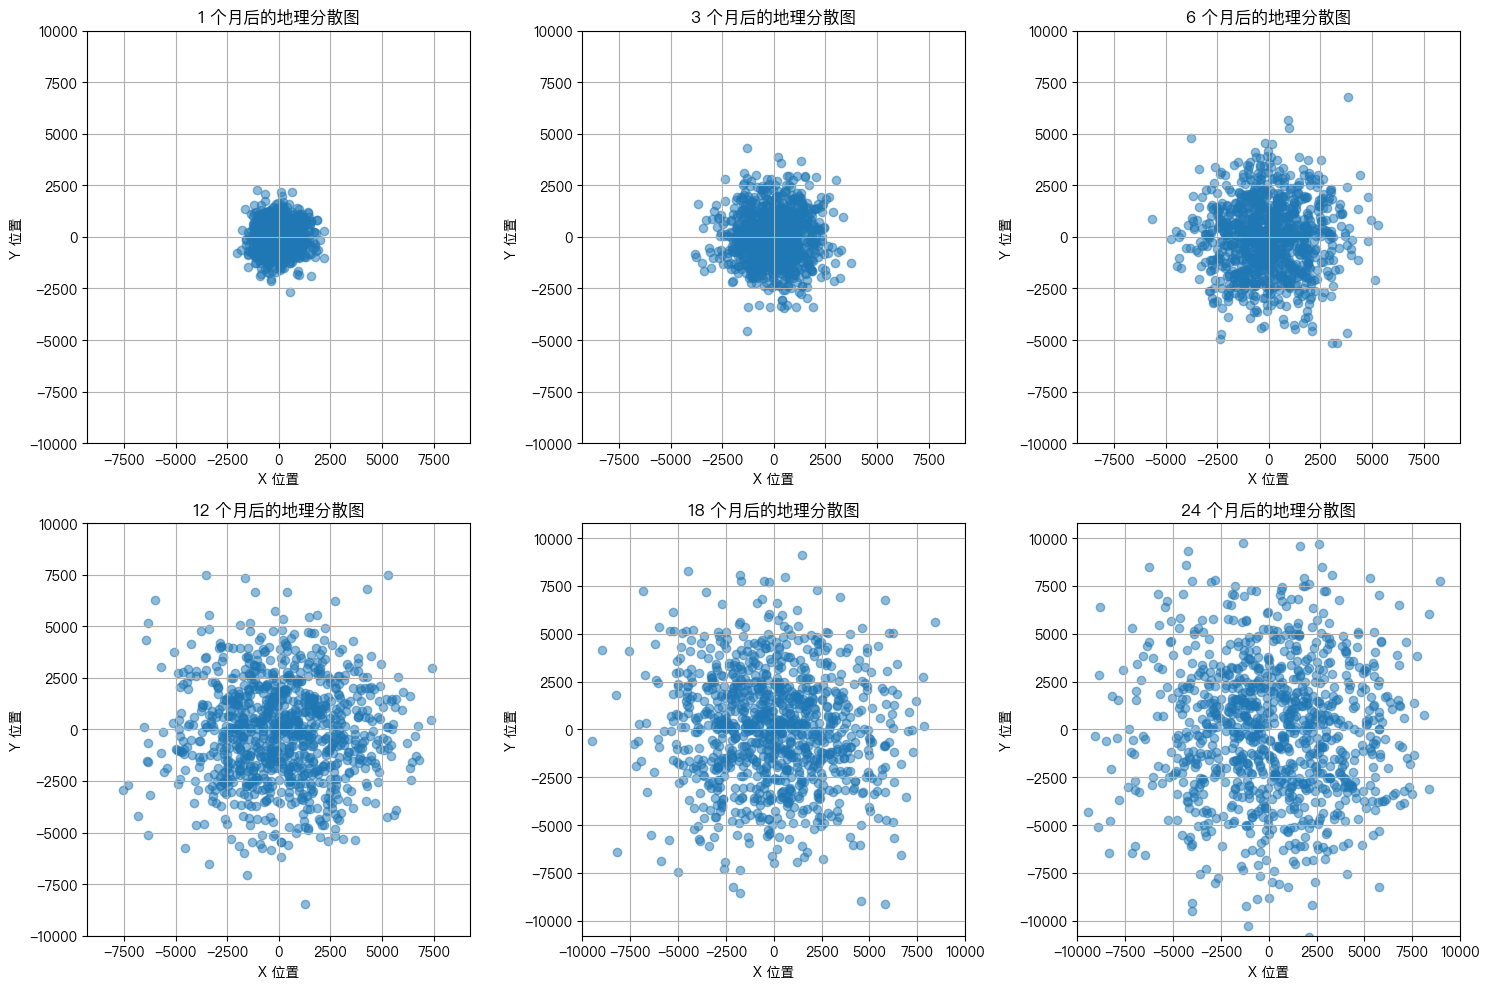

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def seed_spread_simulation_modified(num_seeds, wind_speed, num_steps):
    """
    模拟种子通过风力散播的二维随机散步模型，结合正常距离sN和长距离sL。
    num_seeds: 散布的种子数
    wind_speed: 风速（影响散布的距离）
    num_steps: 模拟的时间步数
    """
    # 初始化种子的位置
    positions = np.zeros((num_seeds, 2))

    # 指数分布参数，设定长距离平均散布为100单位
    lambda_L = 1/100

    # 每一步模拟种子的移动
    for _ in range(num_steps):
        # 随机生成风向，使用[0, 2π]范围的均匀分布
        wind_direction = np.random.uniform(0, 2 * np.pi, num_seeds)

        # 正常距离sN：基于风速的恒定散布距离
        sN = wind_speed * np.random.normal(1, 0.1, num_seeds)

        # 长距离sL：遵循指数分布
        sL = np.random.exponential(scale=1/lambda_L, size=num_seeds)

        # 实际散布距离取sN和sL中的较大者
        actual_distance = np.maximum(sN, sL)

        steps = actual_distance[:, None] * np.array([np.cos(wind_direction), np.sin(wind_direction)]).T

        positions += steps
    
    return positions

num_seeds = 1000  # 模拟1000个种子
wind_speed = 0.5  # 风速，假设0.5/步
num_steps = 50    # 模拟步数
months_list = [1, 3, 6, 12, 18, 24]

plt.figure(figsize=(15, 10))
for idx, months in enumerate(months_list):
    positions = seed_spread_simulation_modified(num_seeds, wind_speed, num_steps * months)
    plt.subplot(2, 3, idx+1)
    plt.scatter(positions[:, 0], positions[:, 1], alpha=0.5)
    plt.title(f'{months} 个月后的地理分散图')
    plt.xlabel("X 位置")
    plt.ylabel("Y 位置")
    plt.grid(True)
    plt.axis('equal')  # 保持x和y轴的刻度一致
    plt.xlim(-10000, 10000)
    plt.ylim(-10000, 10000)

plt.tight_layout()
plt.show()


### 第二个问，仅修改了温度和风速，也就是题目要求的低温地区，温度更低，风速更大，做一些说明比如：低温使蒲公英种群数量减少但风速使其分散范围更广

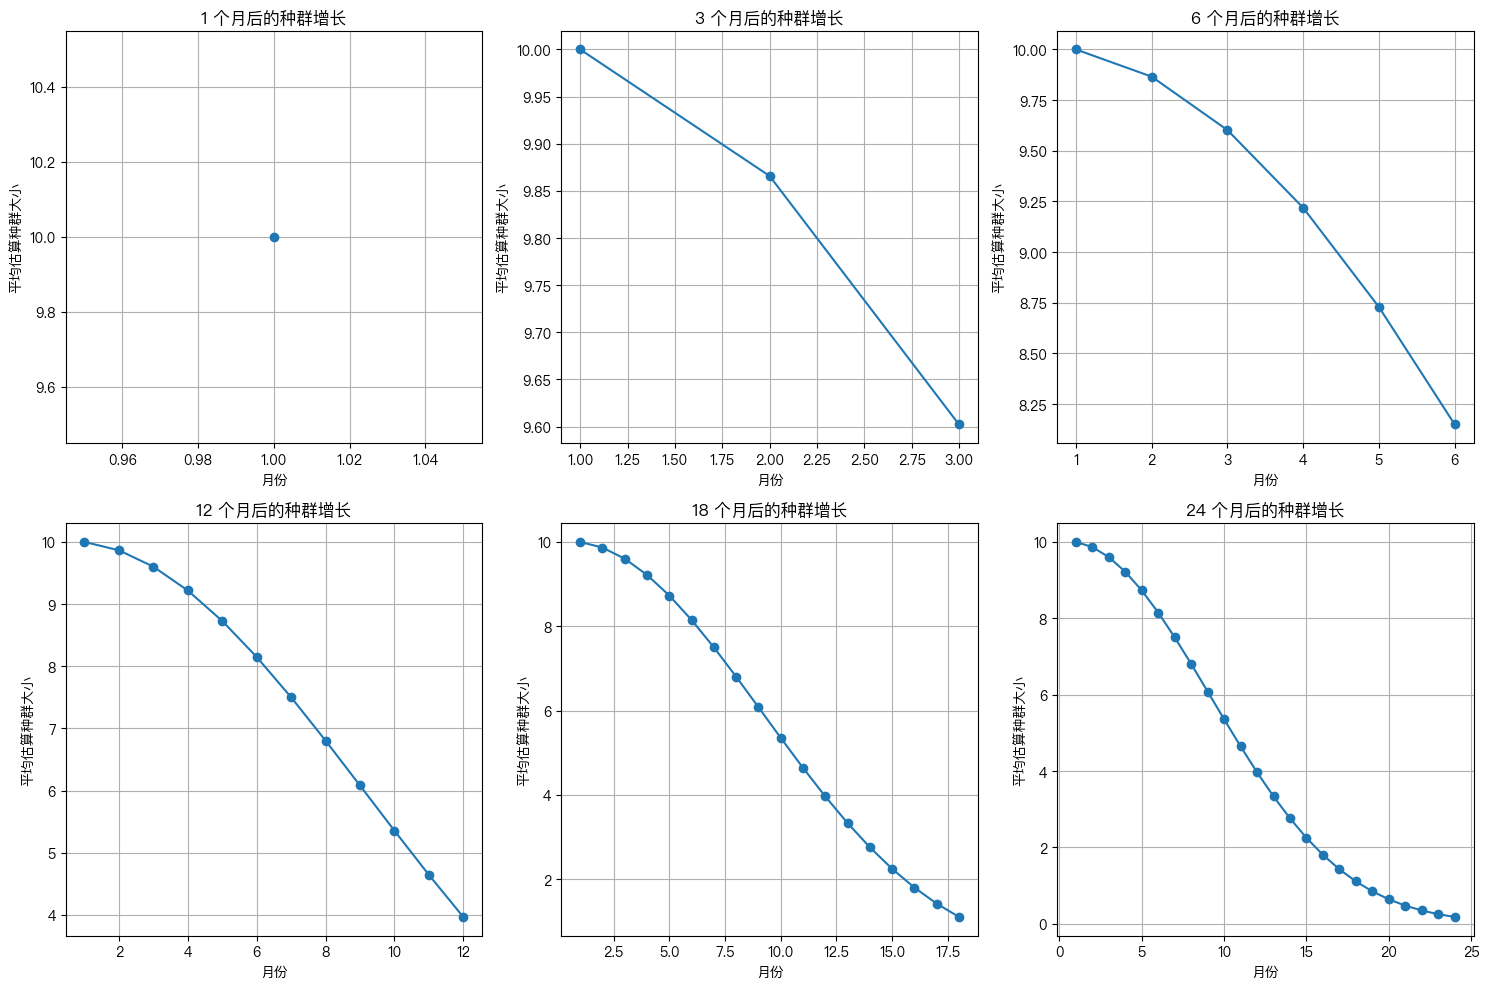

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 环境参数 - 极地城市
mu_T_polar = -10  # 平均温度（摄氏度）
sigma_T_polar = 5  # 温度标准差（摄氏度）
mu_W_DC = 18  # 平均风速
sigma_W_DC = 9.51  # 风速标准差

# 模拟参数
num_months = [1, 3, 6, 12, 18, 24]  # 总月数
num_simulations = 100  # 蒙特卡洛模拟次数
num_seeds = 1000  # 每次模拟的种子数
K = 100  # 环境容量
P0 = 10  # 初始种群大小
r = 0.03  # 内禀增长率
death_rate = 0.015  # 死亡率
optimal_temp = 15  # 最适宜的温度
temp_range = 5  # 温度适宜范围

def generate_monthly_temperatures(mu, sigma, num_months):
    return np.random.normal(mu, sigma, num_months)

# 进行蒙特卡洛模拟
final_populations = np.zeros((num_simulations, max(num_months)))
for simulation in range(num_simulations):
    for idx, months in enumerate(num_months):
        temperatures = generate_monthly_temperatures(mu_T_polar, sigma_T_polar, months)
        wind_speeds = np.random.normal(mu_W_DC, sigma_W_DC, months)
        temp_populations = np.zeros(months)
        for month in range(months):
            seed_positions = seed_spread_simulation_modified(num_seeds, wind_speeds[month], 1)
            temp_modifier = growth_rate_modifier(temperatures[month], optimal_temp, temp_range)
            temp_populations[month] = logistic_growth(month, K, P0, r * temp_modifier, death_rate) if month == 0 else logistic_growth(month, K, temp_populations[month-1], r * temp_modifier, death_rate)
        final_populations[simulation, :months] = temp_populations

# 计算平均植株数量
average_populations = np.mean(final_populations, axis=0)

plt.figure(figsize=(15, 10))
for idx, months in enumerate(num_months):
    plt.subplot(2, 3, idx+1)
    plt.plot(np.arange(1, months+1), average_populations[:months], marker='o')
    plt.title(f'{months} 个月后的种群增长')
    plt.xlabel('月份')
    plt.ylabel('平均估算种群大小')
    plt.grid(True)

plt.tight_layout()
plt.show()


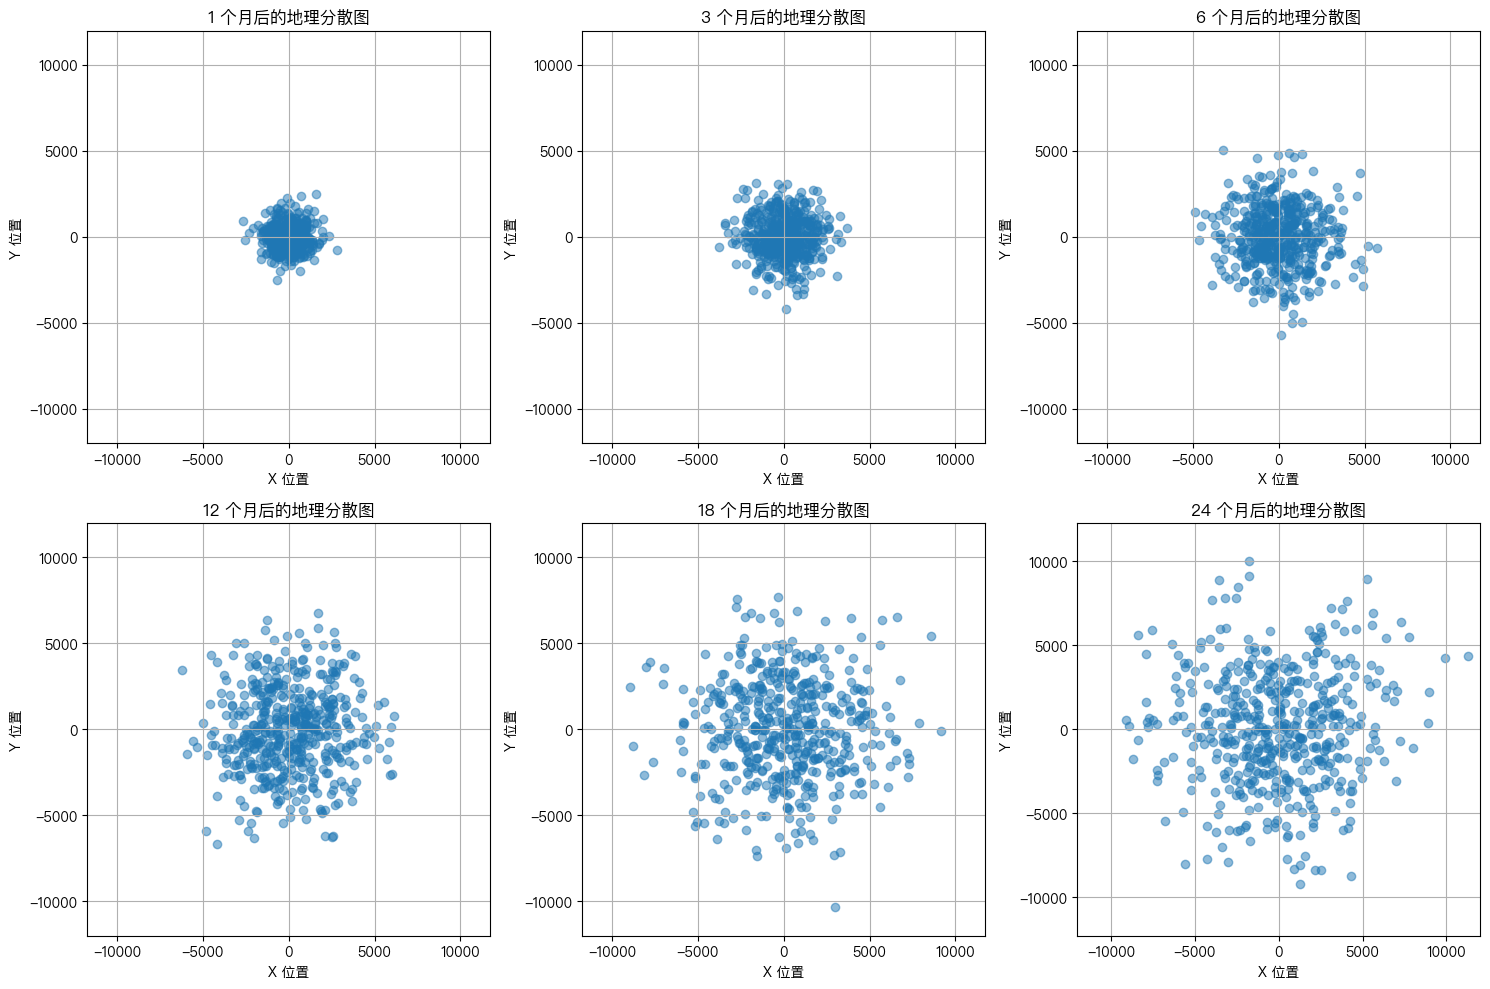

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def seed_spread_simulation_modified(num_seeds, wind_speed, num_steps):
    """
    模拟种子通过风力散播的二维随机散步模型，结合正常距离sN和长距离sL。
    num_seeds: 散布的种子数
    wind_speed: 风速（影响散布的距离）
    num_steps: 模拟的时间步数
    """
    # 初始化种子的位置
    positions = np.zeros((num_seeds, 2))

    # 指数分布参数，设定长距离平均散布为100单位
    lambda_L = 1/100

    # 每一步模拟种子的移动
    for _ in range(num_steps):
        # 随机生成风向，使用[0, 2π]范围的均匀分布
        wind_direction = np.random.uniform(0, 2 * np.pi, num_seeds)

        # 正常距离sN：基于风速的恒定散布距离
        sN = wind_speed * np.random.normal(1, 0.1, num_seeds)

        # 长距离sL：遵循指数分布
        sL = np.random.exponential(scale=1/lambda_L, size=num_seeds)

        # 实际散布距离取sN和sL中的较大者
        actual_distance = np.maximum(sN, sL)

        steps = actual_distance[:, None] * np.array([np.cos(wind_direction), np.sin(wind_direction)]).T

        positions += steps
    
    return positions

num_seeds = 500  # 模拟500个种子
wind_speed = 6.0  # 风速，假设5.0/步（更适合低温地区的风速）
num_steps = 50    # 模拟步数
months_list = [1, 3, 6, 12, 18, 24]

plt.figure(figsize=(15, 10))
for idx, months in enumerate(months_list):
    positions = seed_spread_simulation_modified(num_seeds, wind_speed, num_steps * months)
    plt.subplot(2, 3, idx+1)
    plt.scatter(positions[:, 0], positions[:, 1], alpha=0.5)
    plt.title(f'{months} 个月后的地理分散图')
    plt.xlabel("X 位置")
    plt.ylabel("Y 位置")
    plt.grid(True)
    plt.axis('equal') 
    plt.xlim(-12000, 12000)
    plt.ylim(-12000, 12000)

plt.tight_layout()
plt.show()
